In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train_o, y_train_o), (x_test_o, y_test_o) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
len(x_train_o), len(x_test_o)

(60000, 10000)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

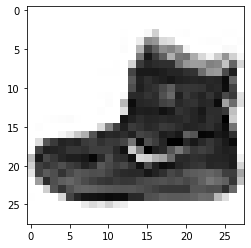

In [13]:
plt.imshow(x_train_o[0], cmap="Greys")

In [17]:
class_names[y_train_o[0]]

'Ankle boot'

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_o)

In [0]:
y_test = tf.keras.utils.to_categorical(y_test_o)

In [26]:
x_train_o.shape

(60000, 28, 28)

In [37]:
numbers = 1
for i in range(3):
  tmp = x_train_o.shape[i]
  print(tmp)
  numbers *= tmp
print(numbers)

60000
28
28
47040000


In [0]:
x_train_o_avg = x_train_o.sum()/numbers

In [0]:
x_train_o_std = x_train_o.reshape(numbers,).std()

In [0]:
x_train = (x_train_o - x_train_o_avg)/x_train_o_std

In [45]:
numbers_t = 1
for i in range(3):
  tmp = x_test_o.shape[i]
  print(tmp)
  numbers_t *= tmp
print(numbers_t)

x_test_o_avg = x_test_o.sum()/numbers_t
x_test_o_std = x_test_o.reshape(numbers_t,).std()
x_test = (x_test_o - x_test_o_avg)/x_test_o_std

10000
28
28
7840000


In [47]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(256,input_dim = 784,activation = tf.keras.layers.LeakyReLU(alpha=0.3) ))

In [0]:
model.add(tf.keras.layers.BatchNormalization())

In [104]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
Total params: 201,984
Trainable params: 201,472
Non-trainable params: 512
_________________________________________________________________


In [0]:
model.add(tf.keras.layers.Dropout(rate = 0.5))

In [106]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
Total params: 201,984
Trainable params: 201,472
Non-trainable params: 512
_________________________________________________________________


In [0]:
model.add(tf.keras.layers.Dense(128,activation = tf.keras.layers.LeakyReLU(alpha=0.3) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.4))
model.add(tf.keras.layers.Dense(64,activation = tf.keras.layers.LeakyReLU(alpha=0.2) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(32,activation = tf.keras.layers.LeakyReLU(alpha=0.1) ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate = 0.2))

model.add(tf.keras.layers.Dense(10,activation = "softmax" ))

In [108]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [0]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [116]:
history = model.fit(x_train, y_train, batch_size = 50, epochs= 20)

Epoch 1/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3571 - accuracy: 0.8744
Epoch 2/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3465 - accuracy: 0.8770
Epoch 3/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3490 - accuracy: 0.8767
Epoch 4/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3457 - accuracy: 0.8790
Epoch 5/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3417 - accuracy: 0.8800
Epoch 6/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3502 - accuracy: 0.8764
Epoch 7/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3453 - accuracy: 0.8784
Epoch 8/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3430 - accuracy: 0.8802
Epoch 9/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3426 - accuracy: 0.8791
Epoch 10/20
1200/1200 [==============================] - 6s 5ms/step - loss: 0.343

In [117]:
loss, score = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8845


In [0]:
## batch_size 300->200->50